In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [59]:
depths = np.arange(0, 1000, 10)
distances = [1, 3, 5, 7]
p = 1e-3 # Noise rate

In [60]:
all_p_logical = []
for distance in distances:
    max_err = (distance - 1) // 2
    p_logical = []
    for depth in depths:
        err_chs = distance*depth
        p_logical.append(sum(math.comb(err_chs, k)*p**k*(1-p)**(err_chs-k) for k in range(max_err+1)))
    all_p_logical.append(p_logical)

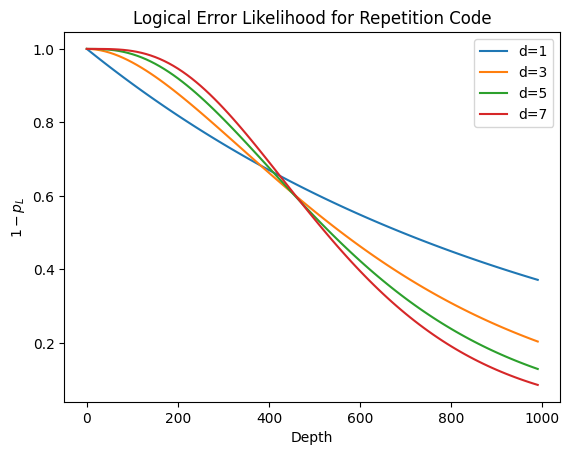

In [61]:
for i, distance in enumerate(distances):
    plt.plot(depths, all_p_logical[i], label=f'd={distance}')

plt.xlabel("Depth")
plt.ylabel("$1-p_L$")
plt.title("Logical Error Likelihood for Repetition Code")
plt.legend()

In [62]:
all_p_0L = []
all_p_1L = []
for distance in distances:
    p_0L = []
    p_1L = []
    for depth in depths:
        p_0L.append(sum(math.comb(depth, k)*p**k*(1-p)**(depth-k) for k in range(0, depth+1, 2))**distance)
        p_1L.append(sum(math.comb(depth, k)*p**k*(1-p)**(depth-k) for k in range(1, depth+1, 2))**distance)

    all_p_0L.append(p_0L)
    all_p_1L.append(p_1L)

In [63]:
all_p_0L = np.array(all_p_0L)
all_p_1L = np.array(all_p_1L)

p_codeword = all_p_0L + all_p_1L

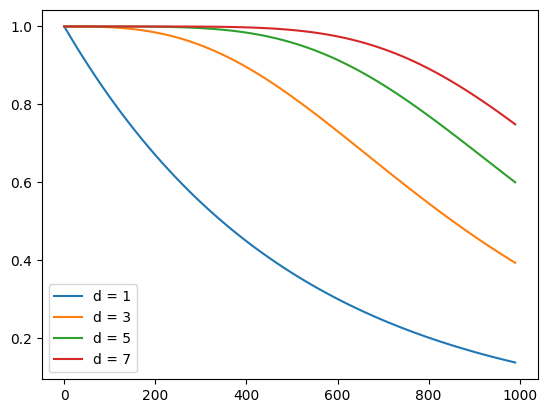

In [64]:

for i, distance in enumerate(distances):
    # plt.plot(depths, all_p_0L[i], label=f"d = {distance}")
    # plt.semilogy(depths, all_p_0L[i], label=f"d = {distance}")
    # plt.plot(depths, all_p_1L[i], label=f"d = {distance}")
    plt.plot(depths, (all_p_0L[i] - all_p_1L[i]) / p_codeword[i], label=f"d = {distance}")

plt.legend()

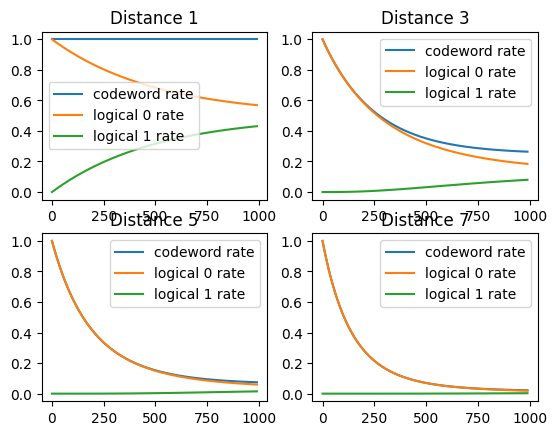

In [66]:
fig, ax = plt.subplots(2, 2)
for i, distance in enumerate(distances):
    ax[i//2][i%2].set_title(f"Distance {distance}")
    ax[i//2][i%2].plot(depths, p_codeword[i], label="codeword rate")
    ax[i//2][i%2].plot(depths, all_p_0L[i], label="logical 0 rate")
    ax[i//2][i%2].plot(depths, all_p_1L[i], label="logical 1 rate")
    ax[i//2][i%2].legend()

